# Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning.

There are two types of linear regression- Simple and Multiple.

<img src="Cost-Function.jpg">

_________________________________________________________________________________________________________________

<img src="r2.png">

In [1]:
def adjR2(y,yhat):
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-1-1)
    print("The value of adjusted R2 is : {}".format(adjusted_r_squared))

## Simple Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# Input X should be in the form of a 1d array
# X = [a,
#      b,
#      c]
# y and targets must in the format of a one dimensional array of binary values here

In [4]:
class SimpleLinearRegression:
    def __init__(self):
        pass

    def __loss(self, yhat, y):
        return np.square(yhat - y).mean()
    
    def fit(self, X, y):
        denominator = X.dot(X) - X.mean()*X.sum()
        self.m = (X.dot(y) - y.mean()*(X.sum()))/denominator
        self.c = (y.mean()*X.dot(X) - X.mean()*X.dot(y))/denominator
     
        yhat = self.m*X + self.c
        
        print("Total loss is :",self.__loss(yhat,y))
        print()
        print("Equation of your line is y = {}x + {}".format(self.m,self.c))
        print()
        
        adjR2(y,yhat)
        
        plt.scatter(X,y)
        plt.plot(X,yhat)
        plt.show()

        
    def predict(self, X):
        return self.m*np.float64(X) + self.c

In [5]:
X = np.array([1,2,3,4,5,6])
y = np.array([5,7,9,11,13,15])

In [6]:
Slr = SimpleLinearRegression()

Total loss is : 0.0

Equation of your line is y = 2.0x + 3.0

The value of adjusted R2 is : 1.0


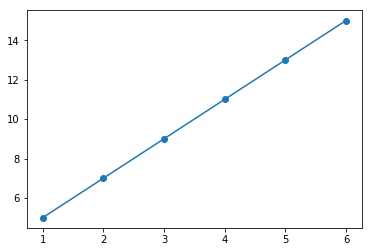

In [7]:
Slr.fit(X,y)

In [8]:
Slr.predict([3,4])

array([ 9., 11.])

## Multiple Linear Regression

In [9]:
# Input X should be in the form of a 2d array
# The way scikit learn implements it
# X = [[a,b],
#      [c,d]]
# y and targets must in the format of a one dimensional array of binary values here

In [10]:
class MultipleLinearRegression:
    def __init__(self):
        self.flag = False
    
    def __loss(self, yhat, y):
        return np.square(yhat - y).mean()
    
    def fit(self, X, y):
        try:
            self.W = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
        except np.linalg.LinAlgError:
            self.flag = True
        if self.flag == True:
            print("The matrix in singular, You were caught by the dummy variable trap, use gradient descent instead")
        else:
                self.W = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
                yhat = X.dot(self.W)

                print("Total loss is :",self.__loss(yhat,y))
                print()
                print("Weights are: {}".format(self.W))
                print()

                adjR2(y,yhat)
        
        
    def predict(self, X):
        if self.flag == True:
            print("No Solution")
        else:
            return X.dot(self.W)

In [11]:
X = np.array([[1,2,3,4,5],[6,7,8,9,10]]).reshape(2,5).T

In [12]:
y = X[:,0]+ 2*X[:,1]

In [13]:
mlr = MultipleLinearRegression()

In [14]:
mlr.fit(X,y)

Total loss is : 0.0

Weights are: [1. 2.]

The value of adjusted R2 is : 1.0


In [15]:
mlr.predict(np.array([[10,20]]))

array([50.])

## Linear Regression with Gradient Descent

In [38]:
class LinearRegression:
    def __init__(self, lr=0.0001, num_iters=100000):
        self.lr = lr
        self.num_iters = num_iters
    
    def __add_ones(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def __loss(self, yhat, y):
        return np.square(yhat - y).mean()
    
    def fit(self, X, y):

        X = self.__add_ones(X)
        print(X)
        
        # weights initialization
        self.W = np.random.randn(X.shape[1])
        print(self.W)
        
        for i in range(self.num_iters):
            yhat = X.dot(self.W)
            delta = yhat - y
            self.W = self.W - self.lr*X.T.dot(delta)

        print("Weights are: {}".format(self.W))
        
        yhat = X.dot(self.W)
        adjR2(y,yhat)

    def predict(self, X):
        return X.dot(self.W)